In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import pprint as pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [32]:
df_cities= pd.DataFrame({"City": cities})
#df_cities= df_cities['City'].str.capitalize()
df_cities

,City
0,srednekolymsk
1,porto seguro
2,sola
3,bengkulu
4,saint george
...,...
605,lensk
606,tanggu
607,vila velha
608,luderitz


In [33]:

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [34]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 2 of set 0 | porto seguro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 3 of set 0 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 4 of set 0 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 5 of set 0 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 6 of set 0 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 7 of set 0 | chokurdakh
http://

Processing record 7 of set 1 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 8 of set 1 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 9 of set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 10 of set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 11 of set 1 | kumluca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 12 of set 1 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 13 of set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b

Processing record 13 of set 2 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 14 of set 2 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 15 of set 2 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 16 of set 2 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 17 of set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 18 of set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 19 of set 2 | keskin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b657

Processing record 19 of set 3 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 20 of set 3 | selimpasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 21 of set 3 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 22 of set 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 23 of set 3 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 24 of set 3 | vigrestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 25 of set 3 | cuenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfc

Processing record 26 of set 4 | mae hong son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 27 of set 4 | pafos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 28 of set 4 | khipro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 29 of set 4 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 30 of set 4 | cobija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 31 of set 4 | someshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 32 of set 4 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing record 32 of set 5 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 33 of set 5 | ouallam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 34 of set 5 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 35 of set 5 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 36 of set 5 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 37 of set 5 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 38 of set 5 | micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3

Processing record 38 of set 6 | gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 39 of set 6 | ankpa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 40 of set 6 | aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 41 of set 6 | idaho falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 42 of set 6 | meadow lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 43 of set 6 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 44 of set 6 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Process

Processing record 46 of set 7 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 47 of set 7 | bekwai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 48 of set 7 | siswa bazar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 49 of set 7 | gisborne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 50 of set 7 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 0 of set 8 | hakkari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 1 of set 8 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing r

Processing record 2 of set 9 | la romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 3 of set 9 | ogaminana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 4 of set 9 | buzdyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 5 of set 9 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 6 of set 9 | wick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 7 of set 9 | shimoga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 8 of set 9 | mirina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Pro

Processing record 9 of set 10 | mumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 10 of set 10 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 11 of set 10 | dankov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 12 of set 10 | sai buri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 13 of set 10 | armacao dos buzios
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 14 of set 10 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 15 of set 10 | gualaceo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a8

Processing record 16 of set 11 | ojinaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 17 of set 11 | sadowara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
City not found!
Processing record 18 of set 11 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 19 of set 11 | faridabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 20 of set 11 | goundam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 21 of set 11 | moshupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b6578cfcc1f3d
Processing record 22 of set 11 | tan an
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7cf0bb5458a870743b2b65

In [35]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
City          545 non-null object
Cloudiness    545 non-null int64
Country       545 non-null object
Date          545 non-null int64
Humidity      545 non-null int64
Temp          545 non-null float64
Lat           545 non-null float64
Lng           545 non-null float64
Wind Speed    545 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.4+ KB


In [36]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,srednekolymsk,13,RU,1573189993,98,-2.19,67.46,153.71,2.80
1,porto seguro,75,BR,1573190030,83,75.20,-16.44,-39.06,4.70
2,sola,74,TZ,1573190030,57,75.67,-3.17,33.80,7.81
3,saint george,75,GR,1573189935,100,55.40,39.45,22.34,2.24
4,alice springs,0,AU,1573189809,10,93.20,-23.70,133.88,10.29


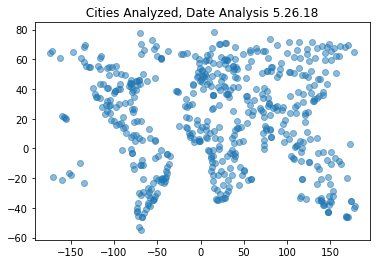

<Figure size 432x288 with 0 Axes>

In [37]:
#Checking global distribution of cities
#If distribution is not good regeneraterandom cities for avoiding data bias due to limited geographical spead of cities
plt.scatter(weather_data['Lng'], weather_data['Lat'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.show()

plt.savefig("Map.png")

Latitude vs. Temperature Plot


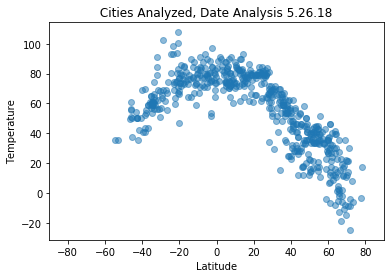

In [39]:
plt.scatter(weather_data['Lat'], weather_data['Temp'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(-90,90)
plt.show()


Latitude vs. Humidity Plot

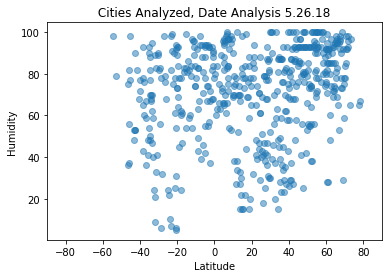

In [40]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-90,90)
plt.show()

#### Latitude vs. Cloudiness Plot

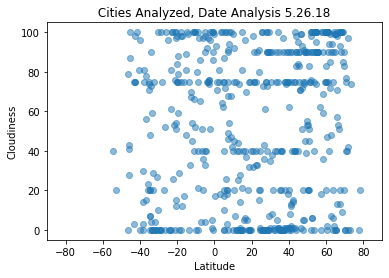

In [41]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-90,90)
plt.show()

#### Latitude vs. Wind Speed Plot

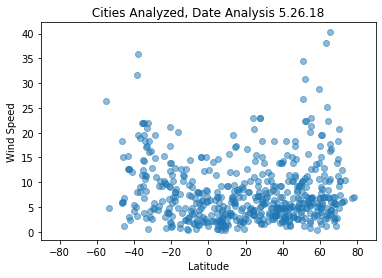

In [42]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-90,90)
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

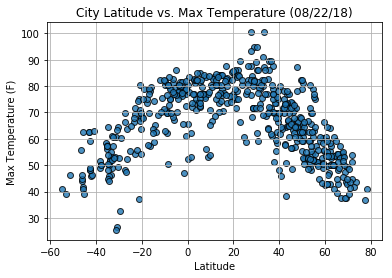

#### Latitude vs. Humidity Plot

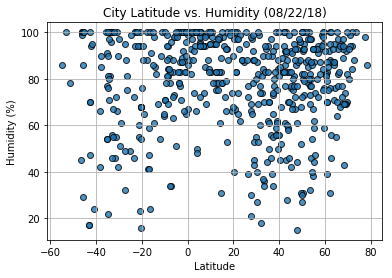

#### Latitude vs. Cloudiness Plot

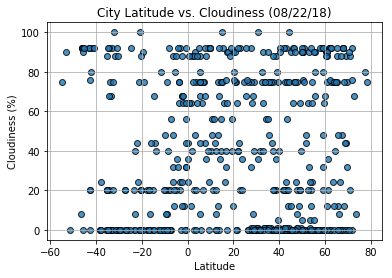

#### Latitude vs. Wind Speed Plot

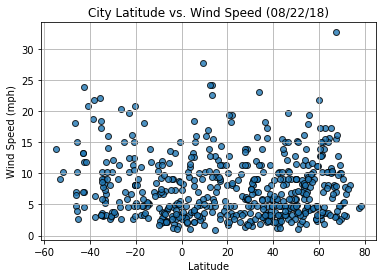